In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [24]:
# Load subset of data (for demonstration)
data = pd.DataFrame({
    'total_sqft': [1056.0, 2600.0, 1440.0, 1521.0],
    'bath': [2.0, 5.0, 2.0, 3.0],
    'bhk': [2, 4, 3, 3],
    'price': [39.07, 120.0, 62.0, 95.0],
    'site_location_Alandi Road': [1, 0, 0, 0],
    'site_location_Ambegaon Budruk': [0, 1, 0, 0],
    'site_location_Anandnagar': [0, 0, 1, 0],
    'site_location_Aundh': [0, 0, 0, 1]
})

In [25]:
X = data.drop(columns=['price'])
y = data['price']

In [26]:
# Train the model with max_depth=2 for simplicity
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [27]:
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

|--- bath <= 2.50
|   |--- site_location_Anandnagar <= 0.50
|   |   |--- value: [39.07]
|   |--- site_location_Anandnagar >  0.50
|   |   |--- value: [62.00]
|--- bath >  2.50
|   |--- site_location_Aundh <= 0.50
|   |   |--- value: [120.00]
|   |--- site_location_Aundh >  0.50
|   |   |--- value: [95.00]



In [19]:
# Predict and calculate MSE
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Final MSE: {mse:.2f}")

Final MSE: 0.00


Final MSE: 143.79

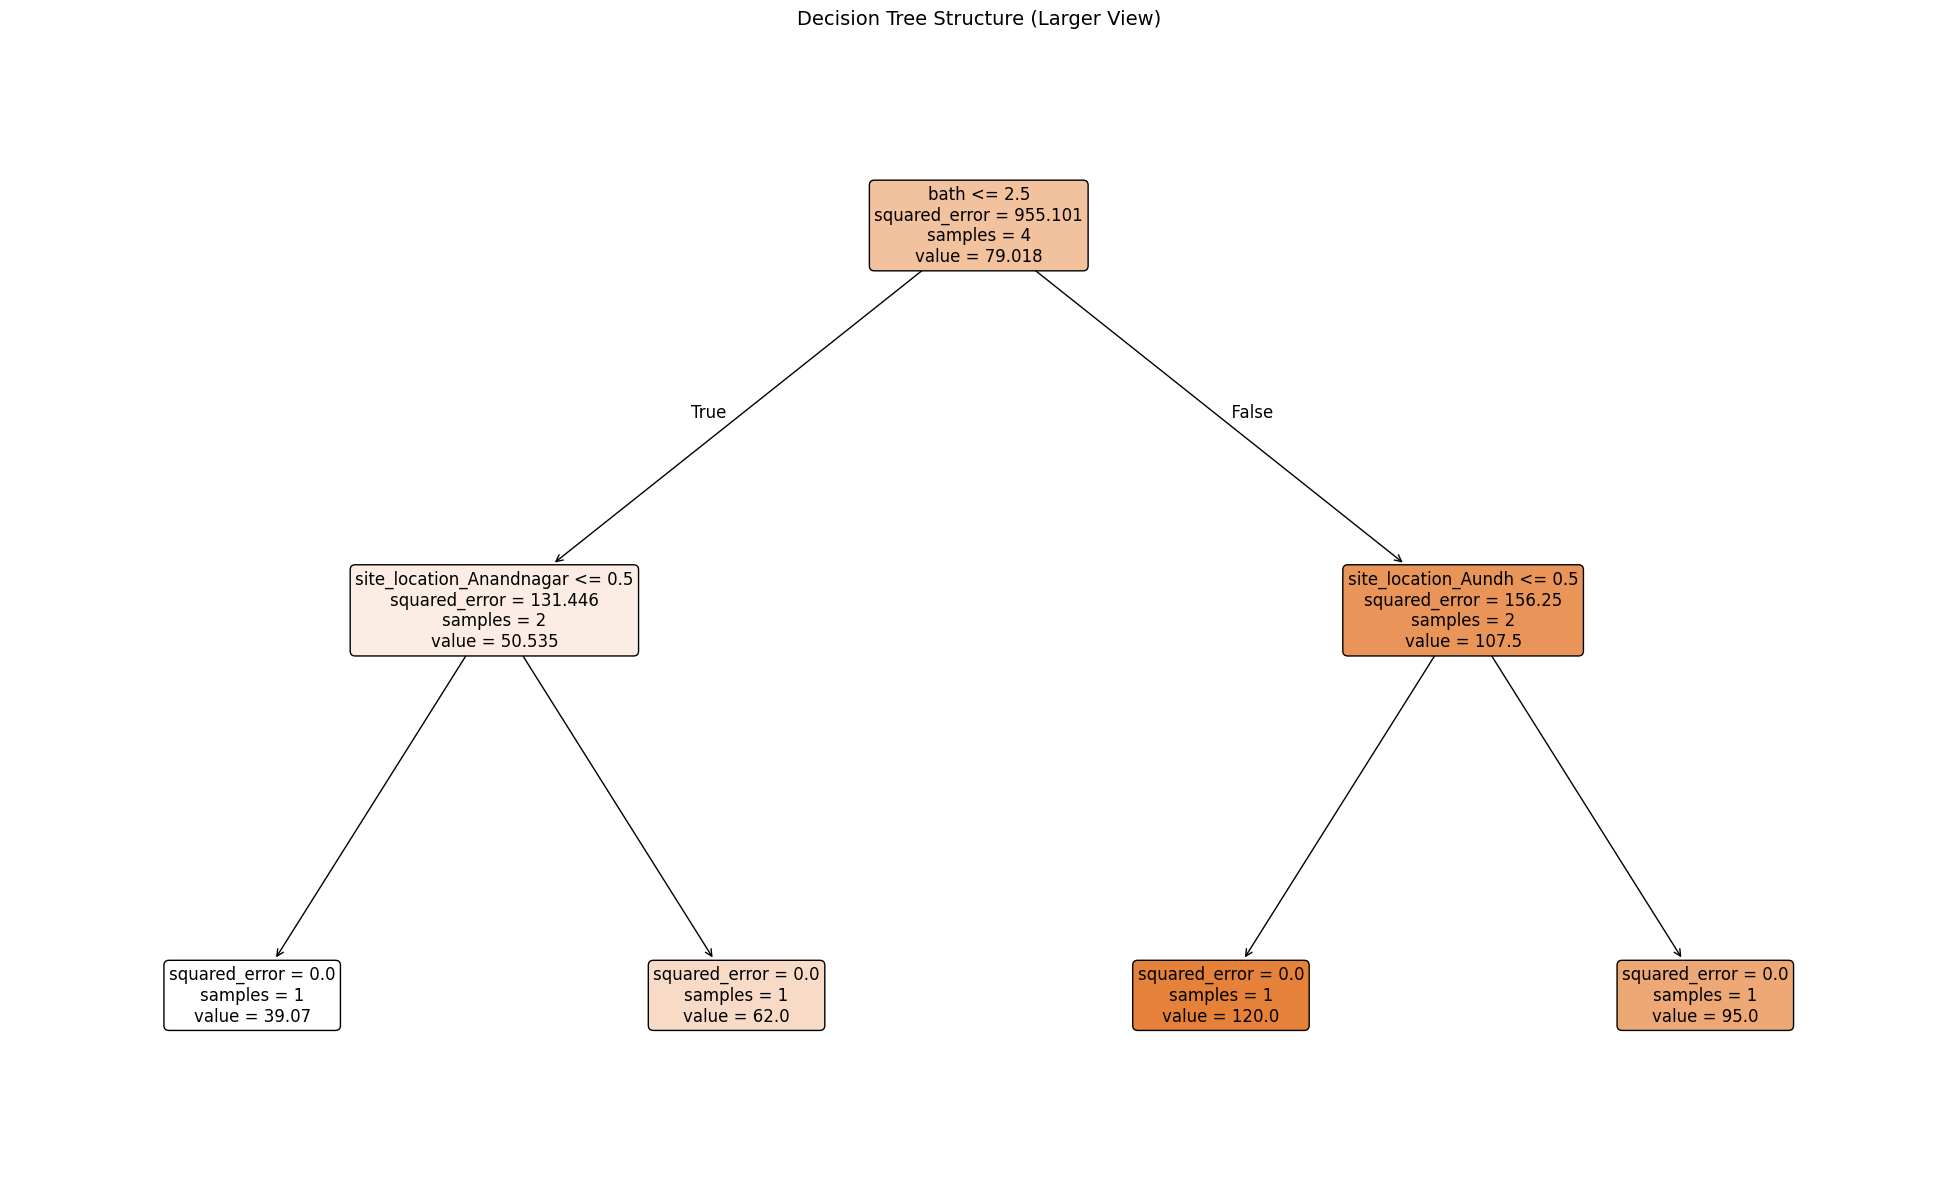

In [28]:
plt.figure(figsize=(25, 15))  # Larger figure size
plot_tree(model, 
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=12)  # Larger font size
plt.title("Decision Tree Structure (Larger View)", fontsize=14)
plt.show()

In [29]:
def calculate_mse(y):
    mean = y.mean()
    return ((y - mean) ** 2).mean()

# Example: Calculate MSE for all possible splits in 'total_sqft'
sorted_sqft = X['total_sqft'].sort_values().unique()
for threshold in [(a + b)/2 for a, b in zip(sorted_sqft[:-1], sorted_sqft[1:])]:
    left_mask = X['total_sqft'] <= threshold
    right_mask = X['total_sqft'] > threshold
    
    mse_left = calculate_mse(y[left_mask])
    mse_right = calculate_mse(y[right_mask])
    weighted_mse = (len(y[left_mask])/len(y)) * mse_left + (len(y[right_mask])/len(y)) * mse_right
    
    print(f"Threshold: {threshold:.2f}, Weighted MSE: {weighted_mse:.2f}")

Threshold: 1248.00, Weighted MSE: 423.17
Threshold: 1480.50, Weighted MSE: 143.85
Threshold: 2060.50, Weighted MSE: 395.25


Decision Tree Rules:
|--- bath <= 2.50
|   |--- site_location_Anandnagar <= 0.50
|   |   |--- value: [39.07]
|   |--- site_location_Anandnagar >  0.50
|   |   |--- value: [62.00]
|--- bath >  2.50
|   |--- site_location_Aundh <= 0.50
|   |   |--- value: [120.00]
|   |--- site_location_Aundh >  0.50
|   |   |--- value: [95.00]


Feature Importances:
total_sqft: 0.0000
bath: 0.8494
bhk: 0.0000
site_location_Alandi Road: 0.0000
site_location_Ambegaon Budruk: 0.0000
site_location_Anandnagar: 0.0688
site_location_Aundh: 0.0818


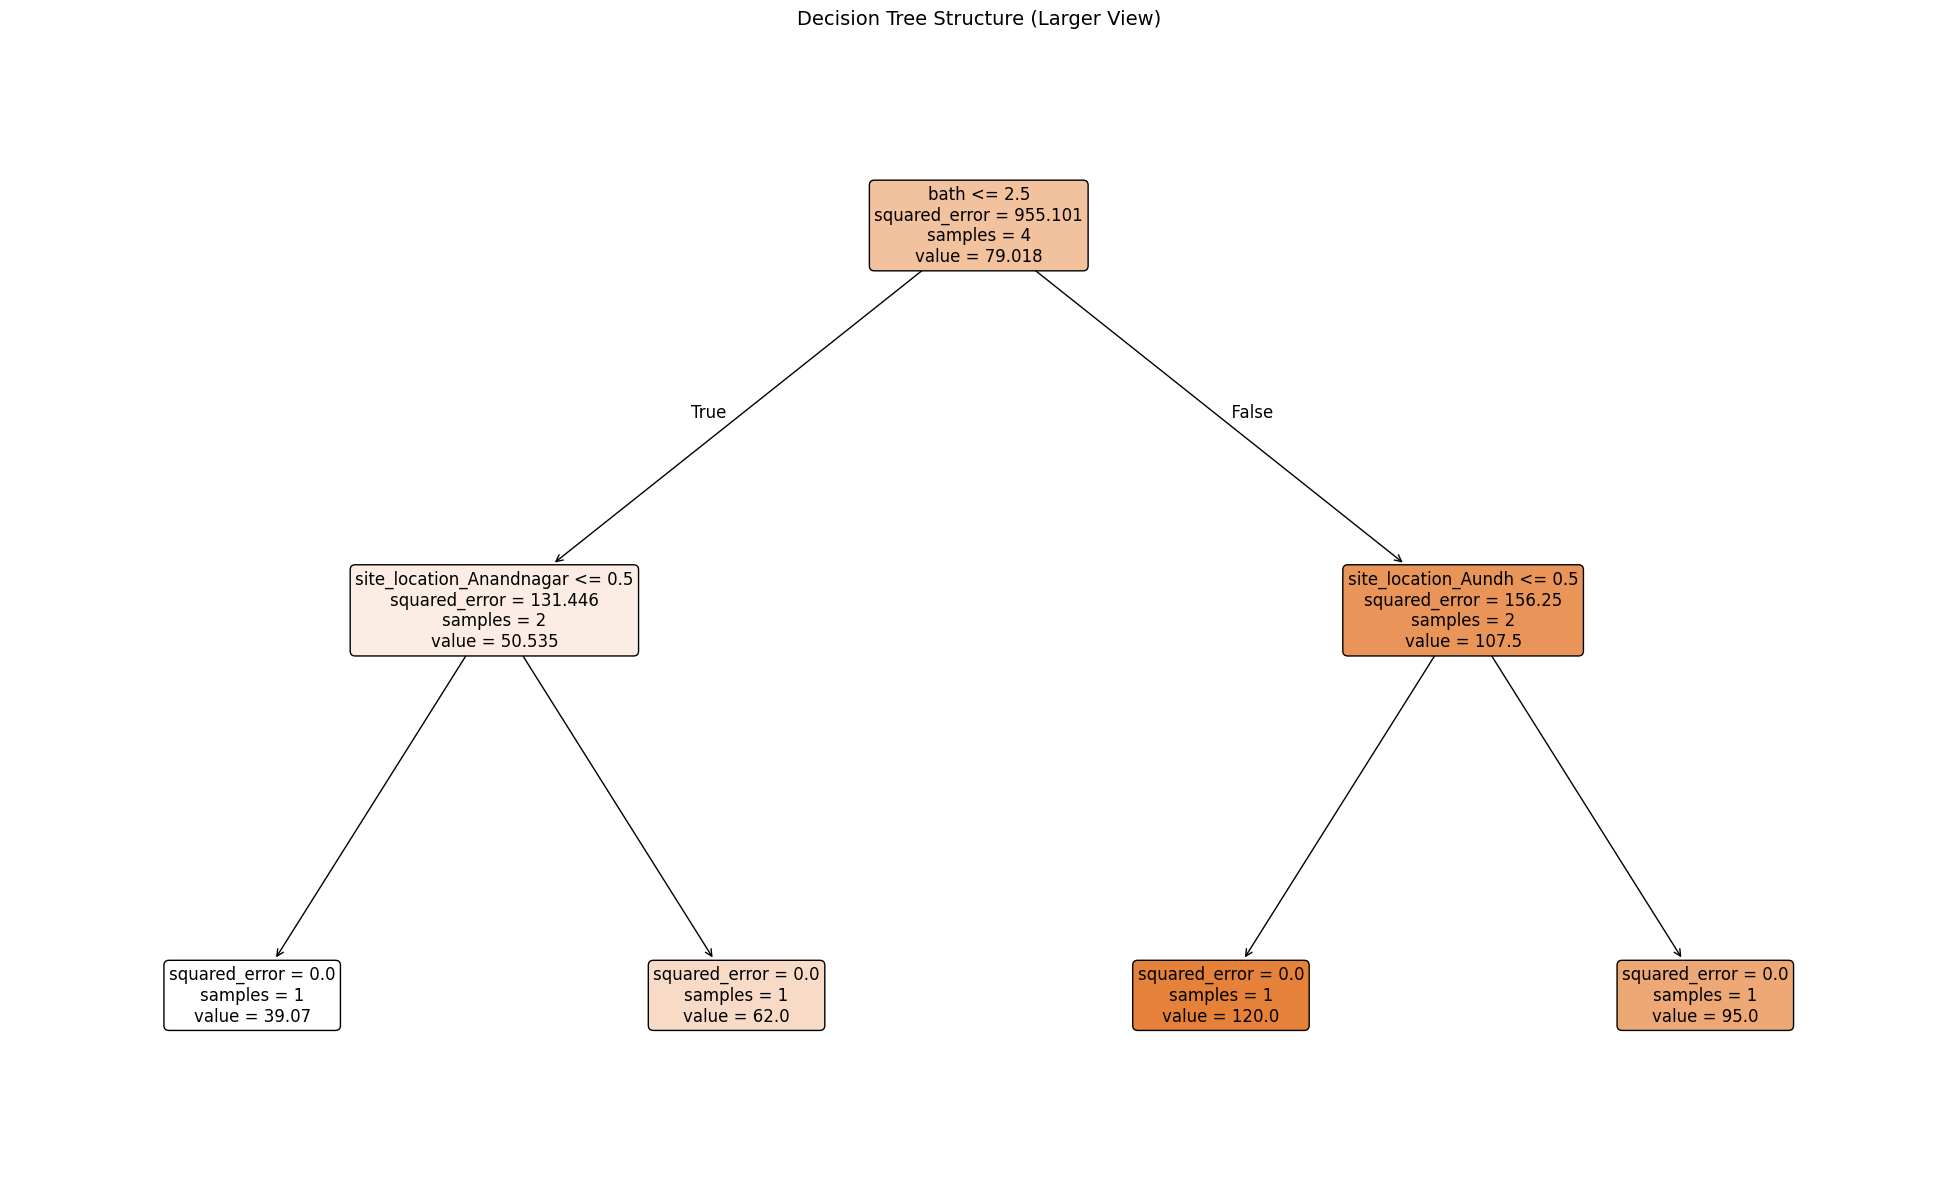

In [30]:
# Train the model
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X, y)

# Print tree rules (text format)
tree_rules = export_text(model, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)

# Print feature importance (how much each feature reduces MSE)
print("\nFeature Importances:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Visualize the tree (larger plot)
plt.figure(figsize=(25, 15))
plot_tree(model, 
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Structure (Larger View)", fontsize=14)
plt.show()